In [3]:
#Your Objective
#Laod dataSet into DataFrame
#incpact row data
# clean invalid entries and handle missing value
# engineer new feature 
# standarize the faromat foe reporting
# export a clean version (convert csv fil)


#import
import numpy as np
import pandas as pd


In [4]:
#Load file
df=pd.read_csv("ecommerce_dataset_with_errors.csv")

#inspact 
print("Data Frame:\n",df.head())

#Summary
print("Summary Data Frame:\n",df.info())

#missing values 
print("Missing Values:\n",df.isna().sum())

#check unique country
print("Unique Country:\n",df['ShipCountry'].value_counts())
#check unique company
print("Unique Company:\n",df['ShippingCompany'].value_counts())


Data Frame:
    OrderID  CustomerID   OrderDate ShippedDate  ShippingCost ShipCountry  \
0     1000       196.0  2025-02-04  2025-12-27        394.78         USA   
1     1001       105.0  2025-01-22  2025-03-21        180.09         NaN   
2     1002       108.0  2025-05-06  2025-05-12        170.12     Germany   
3     1003       175.0  2025-10-05  2025-13-40        284.62       Spain   
4     1004       183.0  2025-07-21  2025-08-24        386.21       Spain   

  ShipCity       ShippingCompany  
0  Toronto  Aramex International  
1   Munich         UPS Worldwide  
2  Toronto  Aramex International  
3  Toronto  Aramex International  
4  Hamburg         UPS Worldwide  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderID          1000 non-null   int64  
 1   CustomerID       980 non-null    float64
 2   OrderDate        1000 non-

In [5]:
# clean invalid entries and handle missing value 
df['OrderDate']=pd.to_datetime(df['OrderDate'],errors='coerce')
df['ShippedDate']=pd.to_datetime(df['ShippedDate'],errors='coerce')

df['ShippingCost']=pd.to_numeric(df['ShippingCost'],errors='coerce')
 
df.loc[df['ShippingCost'] <0 ,'ShippingCost']=np.nan
df['ShipCountry']=df['ShipCountry'].replace("Not_A_Country",np.nan)

In [ ]:
#Heandle Nulls
# df['CustomerID']=df['CustomerID'].fillna(method='ffill') or 
df['CustomerID']=df['CustomerID'].ffill()
mean_cost=df['ShippingCost'].mean()
df['ShippingCost']=df['ShippingCost'].fillna(mean_cost)
df['ShipCountry']=df['ShipCountry'].fillna("Unknown")



In [7]:
#Standardize names

df['ShipCity']=df['ShipCity'].str.strip()
df['ShipCountry']=df['ShipCountry'].str.strip().str.title()
df['ShippingCompany']=df['ShippingCompany'].str.strip().str.title()


In [8]:
#New Feature
df['DelivaryDate']=(df['ShippedDate'] - df['OrderDate']).dt.days
def get_status(x):
 if pd.isna(x):
  return "Unknown"
 elif x > 7:
  return "Late"
 else:
  return "OnTime"
   
df['OrderStatus']=df['DelivaryDate'].apply(get_status)

#IsDomestic
domestic_countries = ["Spain", "Canada", "Germany"]
def check_domestic(country):
 if country in domestic_countries:
  return "Yes"
 else:
  return "No"
 
df['IsDomestic']=df['ShipCountry'].apply(check_domestic)



In [9]:
#Grouping example
grouped_countary=df.groupby('ShipCountry')['ShippingCost'].sum()
print(grouped_countary)


ShipCountry
Canada           44661.793503
France           42508.718337
Germany          39268.669335
Not_A_Country    41822.213836
Spain            40594.700920
Unknown           4895.847084
Usa              45065.473836
Name: ShippingCost, dtype: float64


In [10]:
#Export
df.to_csv("Final_Cleaing.csv",index=0)

print("Countries:",df['ShipCountry'].value_counts())

print("Cities:",df['ShipCity'].value_counts())
print("Companies:",df['ShippingCompany'].value_counts().head(3))

Countries: ShipCountry
Canada           171
France           170
Usa              170
Spain            168
Not_A_Country    156
Germany          145
Unknown           20
Name: count, dtype: int64
Cities: ShipCity
Vancouver    192
Toronto      181
Montreal     165
Paris        158
Hamburg      154
Munich       150
Name: count, dtype: int64
Companies: ShippingCompany
Ups Worldwide      222
Dhl Express        210
Fedex Logistics    193
Name: count, dtype: int64


Axes(0.125,0.11;0.775x0.77)
['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


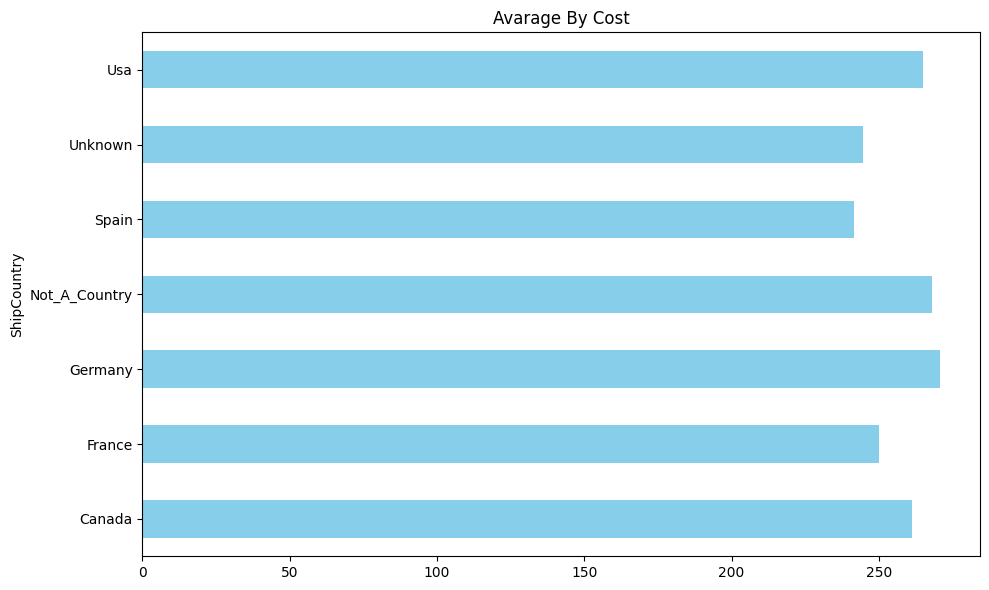

In [ ]:
import matplotlib.pyplot as plt
#to set size
plt.figure(figsize=(10,6))
print(df.groupby('ShipCountry')['ShippingCost'].mean().plot(kind="barh",color='skyblue'))
plt.title("Avarage By Cost")
print(plt.style.available)
plt.style.use('petroff10')
plt.tight_layout()



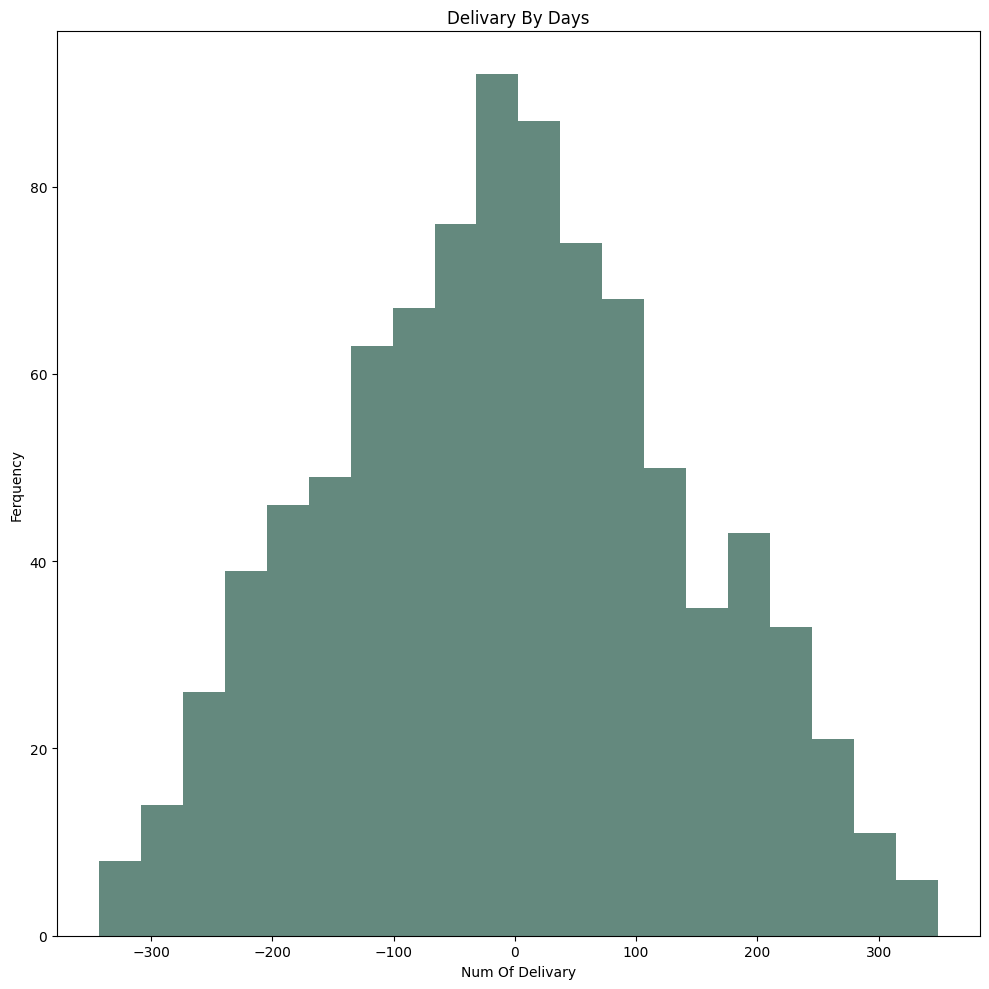

In [12]:
plt.figure(figsize=(10,10))
df['DelivaryDate'].dropna().plot(kind="hist",color='#64897E' ,bins=20)
plt.title("Delivary By Days")
plt.ylabel("Ferquency")
plt.xlabel("Num Of Delivary")
#Adjust layout to avoid overlap or cut-off
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Delivary Stats')

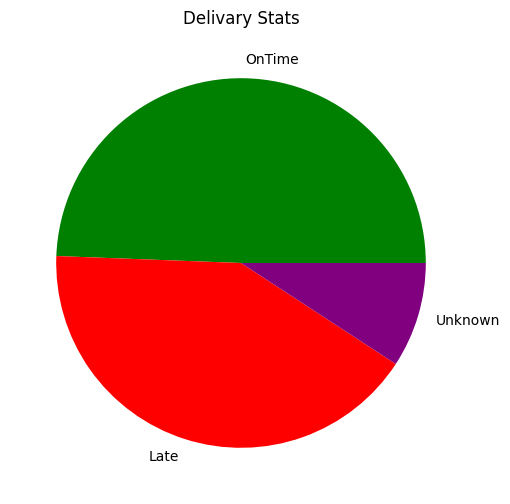

In [13]:
plt.figure(figsize=(6,6))
df['OrderStatus'].value_counts().plot(kind='pie',colors=["green","red","purple"])
plt.ylabel("")
plt.title("Delivary Stats")

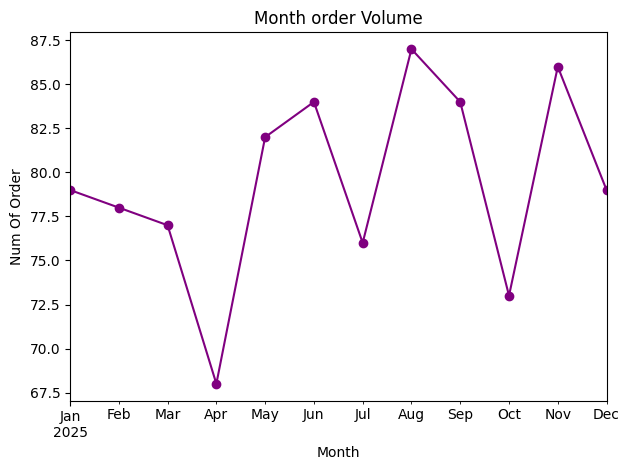

In [16]:

df['Month']=df['OrderDate'].dt.to_period('M')
Month_Order=df.groupby('Month').size()
Month_Order.plot(kind='line',color="purple",marker='o')
plt.title("Month order Volume")
plt.ylabel("Num Of Order")
plt.xlabel("Month")
plt.tight_layout()
